C:\Users\siems\AppData\Local\Temp\ipykernel_19716\1966318512.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter_sent['sent_sentiment'] = df_filter_sent['sent_filtered'].apply(sentiment_score)
C:\Users\siems\AppData\Local\Temp\ipykernel_19716\1966318512.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter_sent['pos_neg'] = df_filter_sent['sent_sentiment'].apply(sentence_sentiment)
C:\Users\siems\AppData\Local\Temp\ipykernel_19716\1966318512.py:78: SettingWithCopyWarning: 
A value is try

,session,year,country,text,sent_filtered,sent_sentiment,pos_neg,positive,negative
0,45,1990,MOZ,"﻿It is with pleasure and satisfaction that, on...",[Our renewed congratulations go to the Secreta...,0.88850,positive,1,0
1,45,1990,MLT,﻿It is indeed an honour for me personally and ...,"[If nothing else, the present crisis will have...",0.56225,positive,1,0
2,45,1990,BLZ,﻿The work of this Organisation over the past y...,[Malta is an example to the smaller States wit...,0.58930,positive,1,0
3,45,1990,PNG,﻿On behalf of the Government and peopleof Papu...,"[The achievements, over theyears, of the Unite...",0.18060,positive,1,0
4,45,1990,AUS,"﻿It is with great pleasure. Sir, that I congra...",[And there is another scourge - the impact of ...,0.77830,positive,1,0
...,...,...,...,...,...,...,...,...,...
4385,68,2013,IRL,"Every day, the peoples of the world whom we ar...",[It offers renewed hope and confidence that th...,0.56240,positive,1,0
4386,68,2013,PSE,"At the outset, I would like to congratulate Hi...",[The position of the European Union with regar...,0.80465,positive,1,0
4387,68,2013,ALB,I am the newly elected Prime Minister of Alban...,"[If we want more effectiveness, better efficie...",0.81030,positive,1,0
4388,68,2013,FJI,"At the outset, I wish to congratulate Presiden...","[At the same time, we recognize the necessity ...",0.76500,positive,1,0


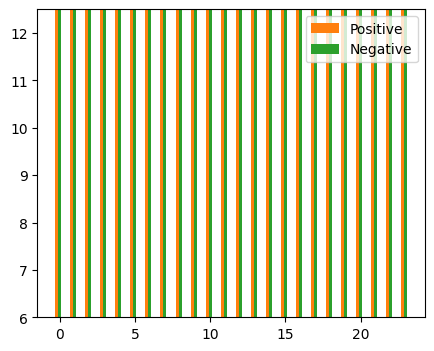

In [2]:
import nltk
from textblob import TextBlob
# nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
import pandas as pd
import json
import re
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
from scipy.stats import expon
import statistics as stats

words = set()
with open('lists/keywords.json', 'r') as file:
    words = set(json.load(file))
with open('lists/pacific_island_states.json', 'r') as file:
    islands = json.load(file)
with open('lists/eu.json', 'r') as file:
    eu = json.load(file)

df = pd.read_csv('processed data/debates_cleaned1.csv')
df = df[['session', 'year', 'country', 'text']]
df['text'] = df['text'].apply(lambda text: text.replace("\n", ""))
# df['tokens'] = df['tokens'].apply(lambda text: text.split())

def sentence_filter_keywords(list):
    filtered = []
    for sentence in list:
        for word in words:
            if word in sentence:
                filtered.append(sentence)
    return filtered

def assign_if_keyword(list_):
    number = 1
    if len(list_) == 0:
        number = 0
    return number

def sentiment_score(list_):
    scores = []
    for sentence in list_:
        sia = SentimentIntensityAnalyzer()
        score = sia.polarity_scores(sentence)
        scores.append(score['compound'])
    return stats.median(scores)

def sentence_sentiment(number):
    value = 'negative'
    if number > 0:
        value = 'positive'
    return value

def pos(string):
    number = 0
    if string == 'positive':
        number = 1
    return number

def neg(string):
    number = 0
    if string == 'negative':
        number = 1
    return number
    
df['sentences'] = df['text'].apply(lambda text: sent_tokenize(text))
df['sent_filtered'] = df['sentences'].apply(sentence_filter_keywords)
df['1_0'] = df['sent_filtered'].apply(assign_if_keyword)

df_filter_sent = df.loc[df['1_0'] != 0]
df_filter_sent['sent_sentiment'] = df_filter_sent['sent_filtered'].apply(sentiment_score)
df_filter_sent['pos_neg'] = df_filter_sent['sent_sentiment'].apply(sentence_sentiment)

df_final = df_filter_sent[['session', 'year', 'country', 'text', 'sent_filtered', 'sent_sentiment', 'pos_neg']]

df_final['positive'] = df_final['pos_neg'].apply(pos)
df_final['negative'] = df_final['pos_neg'].apply(neg)

display(df_final)

df_vis = df_final.groupby(by='year')[['positive', 'negative']].sum()
df_vis

xs = np.arange(24)
plt.figure(figsize=(5,4))
plt.bar(xs-0.2, df_vis['positive'], label='Positive', color='C1', width=0.2)
plt.bar(xs, df_vis['negative'], label='Negative', color='C2', width=0.2)
#plt.xticks(xs, ['1990', '1991', '1992', '1993', '1994', '1995', '1996'])
plt.ylim(6, 12.5)
plt.yticks(np.arange(6, 13))
plt.legend()
plt.show()

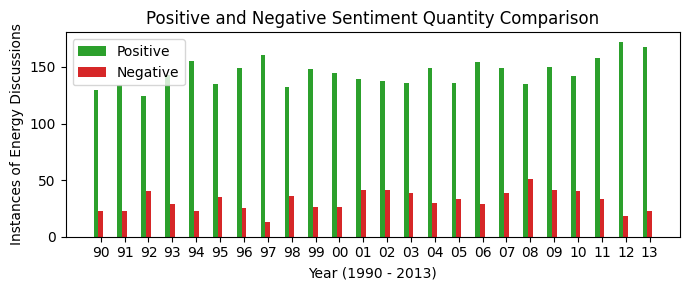

In [8]:
df_vis
xs = np.arange(24)
plt.figure(figsize=(7,3))
plt.bar(xs-0.2, df_vis['positive'], label='Positive', color='C2', width=0.2)
plt.bar(xs, df_vis['negative'], label='Negative', color='C3', width=0.2)
plt.xticks(xs, ['90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '00',
               '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
               '13'])
plt.legend()
plt.title('Positive and Negative Sentiment Quantity Comparison')
plt.xlabel('Year (1990 - 2013)')
plt.ylabel('Instances of Energy Discussions')
plt.tight_layout()
plt.savefig('figs/sentiment.png')
plt.show()

In [4]:
keyword_df = pd.read_csv('debates_cleaned1.csv')
words = set()
with open('keywords.json', 'r') as file:
    words = set(json.load(file))
with open('pacific_island_states.json', 'r') as file:
    islands = json.load(file)
with open('eu.json', 'r') as file:
    eu = json.load(file)

def count_keywords(tokens):
    counter = 0
    re.sub(r'[^\x20-\x7E]', '', tokens)
    for token in tokens.split():
        counter += 1 if token in words else 0
    return counter

keyword_df['keywords'] = keyword_df['tokens'].apply(count_keywords)
keyword_df = keyword_df.sort_values(by = 'year')
keyword_df = keyword_df.loc[keyword_df['year'] > 1990]
keyword_df = keyword_df.groupby(by = 'year')['keywords'].sum()
# display(keyword_df)

energy_df = pd.read_csv('merged.csv')
energy_df = energy_df.sort_values(by = 'year')
hydro_df = energy_df.groupby(by = 'year')['Electricity - total hydro production'].sum()
nuclear_df = energy_df.groupby(by = 'year')['Electricity - total nuclear production'].sum()
solar_df = energy_df.groupby(by = 'year')['Electricity - total solar production'].sum()
wind_df = energy_df.groupby(by = 'year')['Electricity - total wind production'].sum()
# display(energy_df)
# display(hydro_df)
# display(nuclear_df)
# display(solar_df)
# display(wind_df)

plt.plot(keyword_df.index, keyword_df)
plt.title('Keywords Used (1991 - 2013)')
plt.xlabel('Year')
plt.ylabel('Number of keywords used')
plt.show()

plt.plot(hydro_df.index, hydro_df, color='green')
plt.title('Hydropower Production (1991 - 2013)')
plt.xlabel('Year')
plt.ylabel('Hydropower Production')
plt.show()

plt.plot(nuclear_df.index, nuclear_df, color = 'orange')
plt.title('Nuclear Power Production (1991 - 2013)')
plt.xlabel('Year')
plt.ylabel('Nuclear Power Production')
plt.show()

plt.plot(solar_df.index, solar_df, color='red')
plt.title('Solar Power Production (1991 - 2013)')
plt.xlabel('Year')
plt.ylabel('Solar Power Production')
plt.show()

plt.plot(wind_df.index, wind_df, color='purple')
plt.title('Wind Power Production (1991 - 2013)')
plt.xlabel('Year')
plt.ylabel('Wind Power Production')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'debates_cleaned1.csv'